<a href="https://colab.research.google.com/github/uervitonsantos/Atividade_Analise_Bayseana_Com_RSTAN/blob/main/Atividade_Analise_Bayseana_Com_RSTAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Atividade de analise inferencial Bayseana com RStan aplicado em um conjundo de dados de confiabilidade de motores

Tutorial de referencia: https://ourcodingclub.github.io/tutorials/stan-intro/

Bayesian Model with RStan: https://www.kaggle.com/code/dhafer/bayesian-model-with-rstan


Fonte dos dados: https://www.kaggle.com/datasets/eduardopoleze/parmetros-operacionais-bombamotor-eltrico

Estatística Bayesiana com R e Stan. prof. José Eduardo Storopoli: https://www.youtube.com/watch?v=m_kJwaL2KHQ&list=PLpTXaEnTpmwNwBwwwLTDmCLekoUPtc0cP&index=10

Aula Inferência Bayesiana com prof. Gustavo Ferreira: https://www.youtube.com/watch?v=YKZ1euMRsbs&list=PL5nbzsxqG2FPrVmqbLafXqOrE3djThquN



In [1]:
%load_ext rpy2.ipython

In [ ]:
# run the next line if you already have rstan installed
# remove.packages(c("StanHeaders", "rstan"))
%%R
install.packages("rstan", repos = c("https://mc-stan.org/r-packages/", getOption("repos")))

In [ ]:
%%R
library("rstan") # observe startup messages
library("bayesplot")
#library("rstanarm")
library("ggplot2")
library("dplyr")

In [4]:
%%R
df <- read.csv("/content/drive/MyDrive/Colab Notebooks/DateSet/Dataset_Motor_Bomba_teste.txt", header = TRUE, sep = ";", dec = ",")
head(df)

      Data.e.Hora Temp..Estator.Fase.U Temp..Estator.Fase.V
1 02/01/2016 0:00             38.13657             39.87268
2 02/01/2016 0:02             38.13657             39.87268
3 02/01/2016 0:04             38.13657             39.87268
4 02/01/2016 0:06             38.02083             39.75694
5 02/01/2016 0:08             38.02083             39.75694
6 02/01/2016 0:10             37.96296             39.69907
  Temp..Estator.Fase.WA Temp..Estator.Fase.WB Vibração.Bomba.LA Vazão.Bomba
1              36.57407              38.77315        0.00000000           0
2              36.57407              38.77315        0.00000000           0
3              36.57407              38.77315        0.03674769           0
4              36.51620              38.71528        0.00000000           0
5              36.51620              38.71528        0.00000000           0
6              36.51620              38.59954        0.00000000           0
  Corrente Pressão.Desc. Pressão.Suc Posição.FCV

In [5]:
%%R
names(df)

 [1] "Data.e.Hora"                     "Temp..Estator.Fase.U"           
 [3] "Temp..Estator.Fase.V"            "Temp..Estator.Fase.WA"          
 [5] "Temp..Estator.Fase.WB"           "Vibração.Bomba.LA"              
 [7] "Vazão.Bomba"                     "Corrente"                       
 [9] "Pressão.Desc."                   "Pressão.Suc"                    
[11] "Posição.FCV"                     "Temp..externo.mancal.escora.LNA"
[13] "Temp..interno.mancal.escora.LNA" "Pressão.Selo.LA"                
[15] "Pressão.Selo.LNA"                "Temp..mancal.LA.bomba"          
[17] "Temp..mancal.LA.motor"           "Temp..mancal.LNA.bomba"         
[19] "Temp..mancal.LNA.motor"          "Temp..Oleo.ULF"                 


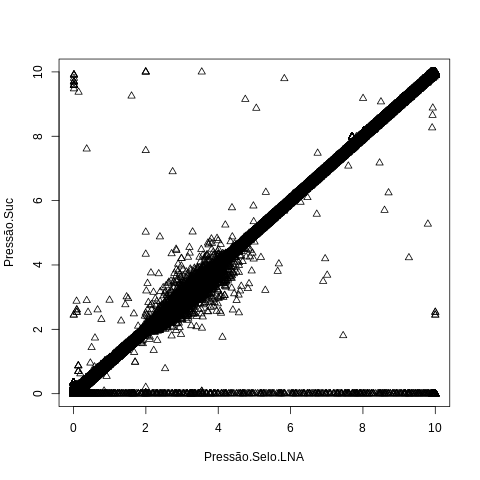

In [11]:
%%R
plot(Pressão.Suc ~ Pressão.Selo.LNA, pch = 2, data = df)

In [ ]:
%%R
lm1 <- lm(Data.e.Hora ~ Pressão.Desc., data = df)
summary(lm1)

In [ ]:
%%R
abline(lm1, col = 2, lty = 2, lw = 3)